In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.io as pio
import pickle


Metrics Dependencies

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve


Validation Dependencies

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline, make_pipeline


In [36]:
# Tuning
from sklearn.model_selection import GridSearchCV

# Feature Extraction
from sklearn.feature_selection import RFE

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder


Models of sklearn

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


Ensembles

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [39]:
warnings.filterwarnings('ignore')


sns.set_style("whitegrid", {'axes.grid' : False})
pio.templates.default = "plotly_white"


In [40]:
df = pd.read_csv('Fertilizer Prediction.csv')
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.000000,52.000000,38,Sandy,Maize,37,0,0,Urea
1,29.000000,52.000000,45,Loamy,Sugarcane,12,0,36,DAP
2,34.000000,65.000000,62,Black,Cotton,7,9,30,14-35-14
3,32.000000,62.000000,34,Red,Tobacco,22,0,20,28-28
4,28.000000,54.000000,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
92485,26.774637,66.413269,27,Loamy,coffee,107,34,32,20-20
92486,27.417112,56.636362,38,Clayey,coffee,99,15,27,Urea
92487,24.131797,67.225123,38,Sandy,coffee,118,33,30,DAP
92488,26.272418,52.127394,48,Loamy,coffee,117,32,34,17-17-17


In [41]:
# Remove Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.000000,52.000000,38,Sandy,Maize,37,0,0,Urea
1,29.000000,52.000000,45,Loamy,Sugarcane,12,0,36,DAP
2,34.000000,65.000000,62,Black,Cotton,7,9,30,14-35-14
3,32.000000,62.000000,34,Red,Tobacco,22,0,20,28-28
4,28.000000,54.000000,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
92485,26.774637,66.413269,27,Loamy,coffee,107,34,32,20-20
92486,27.417112,56.636362,38,Clayey,coffee,99,15,27,Urea
92487,24.131797,67.225123,38,Sandy,coffee,118,33,30,DAP
92488,26.272418,52.127394,48,Loamy,coffee,117,32,34,17-17-17


In [42]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df_out['Soil Type'])
df_out['Soil Type'] = le.transform(df_out['Soil Type'])
le.fit(df_out['Crop Type'])
df_out['Crop Type'] = le.transform(df_out['Crop Type'])
df_out


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.000000,52.000000,38,4,3,37,0,0,Urea
1,29.000000,52.000000,45,2,8,12,0,36,DAP
2,34.000000,65.000000,62,0,1,7,9,30,14-35-14
3,32.000000,62.000000,34,3,9,22,0,20,28-28
4,28.000000,54.000000,46,1,6,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
92485,26.774637,66.413269,27,2,15,107,34,32,20-20
92486,27.417112,56.636362,38,1,15,99,15,27,Urea
92487,24.131797,67.225123,38,4,15,118,33,30,DAP
92488,26.272418,52.127394,48,2,15,117,32,34,17-17-17


Spliting data to training and validation set

In [43]:
target ='Fertilizer Name'
x = df_out.drop(target, axis=1)
y = df_out[target]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=0)

Training the model

In [49]:
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier())
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)

In [50]:
print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")
    

Training Accuracy Score: 81.3%
Validation Accuracy Score: 15.7%


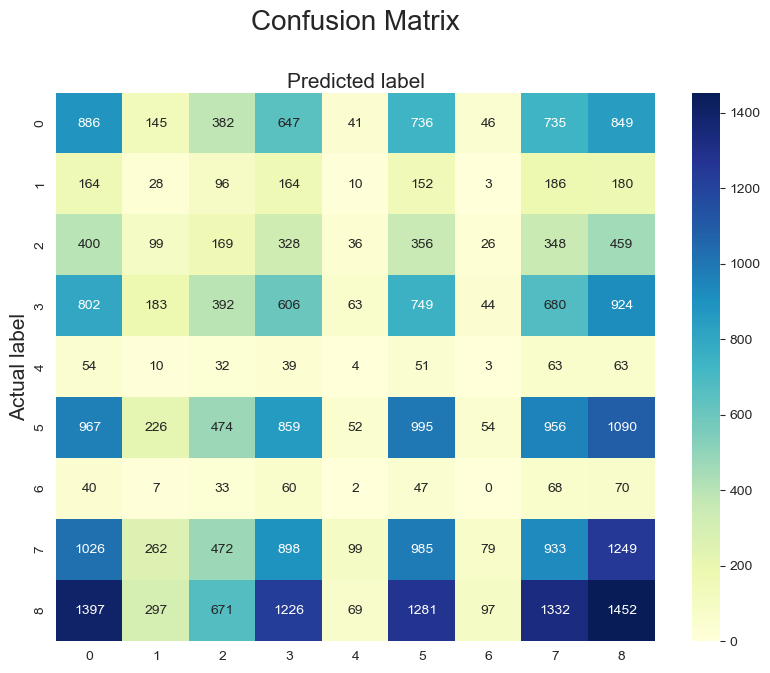

In [51]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', fontsize=20, y=1.1)
plt.ylabel('Actual label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.show()
    

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    14-35-14       0.15      0.20      0.17      4467
    14-35-15       0.02      0.03      0.03       983
    17-17-17       0.06      0.08      0.07      2221
       20-20       0.13      0.14      0.13      4443
       20-21       0.01      0.01      0.01       319
       28-28       0.19      0.18      0.18      5673
       28-29       0.00      0.00      0.00       327
         DAP       0.18      0.16      0.17      6003
        Urea       0.23      0.19      0.21      7822

    accuracy                           0.16     32258
   macro avg       0.11      0.11      0.11     32258
weighted avg       0.16      0.16      0.16     32258



In [53]:
file = open('new-fertilizers-model.pkl', 'wb')
pickle.dump(model, file)